In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv("/content/diamonds_new (1).csv")


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


## **HANDLE MISSING VALUE**

In [139]:
df.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

<Axes: >

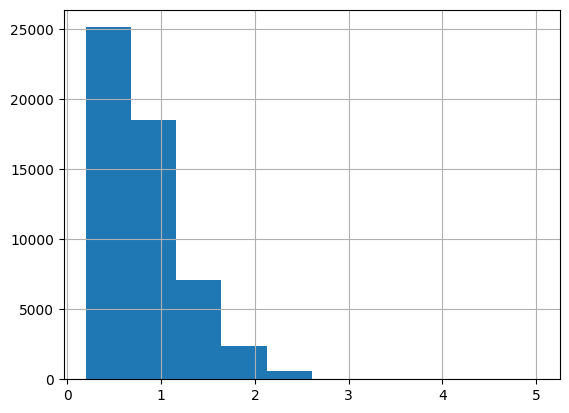

In [140]:
df['carat'].hist()

<Axes: >

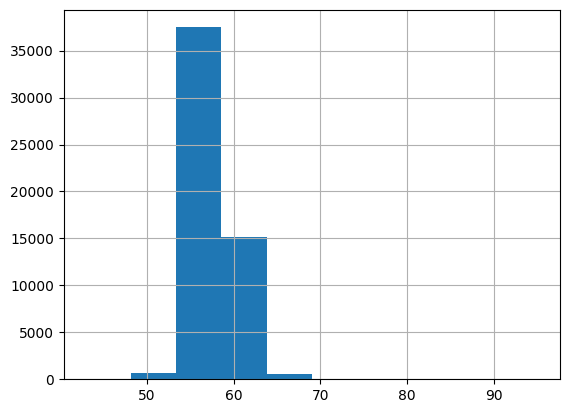

In [141]:
df['table'].hist()

In [142]:
df['carat']=df['carat'].fillna(df['carat'].median())
df['table']=df['table'].fillna(df['table'].median())
df['color']=df['color'].fillna("G")


In [143]:
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# **OUTLIERS DETECTION**

In [145]:
df.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [146]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [147]:
####iqr and z score

<function matplotlib.pyplot.show(close=None, block=None)>

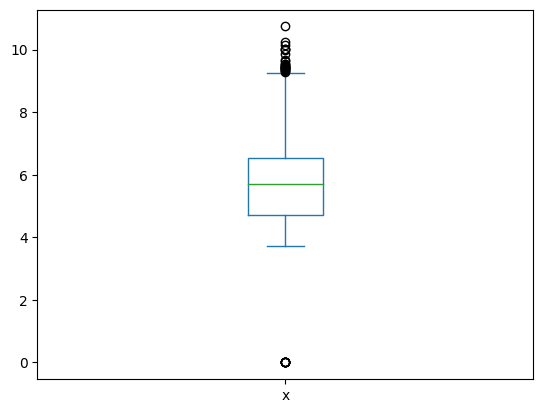

In [148]:
df['x'].plot(kind="box")
plt.show

In [149]:
Q1=df['x'].quantile(0.25)
Q2=df['x'].quantile(0.5)
Q3=df['x'].quantile(0.75)

In [150]:
print(Q1)
print(Q2)
print(Q3)

4.71
5.7
6.54


In [151]:
df['x'].median()

5.7

In [152]:
IQR=Q3-Q1
LC=Q1-(1.5*IQR)
UC=Q3+(1.5*IQR)
print(LC,UC)

1.9649999999999999 9.285


In [153]:
print(LC)
print(UC)


1.9649999999999999
9.285


In [154]:
outliers=[]
for x in df['x']:
  if((x>UC)or(x<LC)):
    outliers.append(x)

In [155]:
outliers

[0.0,
 0.0,
 0.0,
 9.54,
 9.38,
 9.53,
 9.44,
 9.49,
 9.65,
 0.0,
 9.42,
 9.44,
 9.32,
 10.14,
 10.02,
 0.0,
 9.42,
 10.01,
 9.86,
 9.3,
 10.0,
 10.74,
 0.0,
 9.36,
 10.23,
 9.51,
 9.44,
 9.66,
 9.35,
 9.41,
 0.0,
 0.0]

In [156]:
a = df['x']>UC
df.loc[a].index

Int64Index([22741, 22831, 23644, 24131, 24297, 24328, 24816, 25460, 25850,
            25998, 25999, 26431, 26444, 26534, 26932, 27130, 27415, 27514,
            27630, 27638, 27649, 27679, 27684, 27685],
           dtype='int64')

In [157]:
df=df.drop([ 22741, 22831, 23644, 24131, 24297, 24328, 24816, 25460, 25850,
            25998, 25999, 26431, 26444, 26534, 26932, 27130, 27415, 27514,
            27630, 27638, 27649, 27679, 27684, 27685])

Text(0.5, 1.0, 'BOX PLOT OF X ')

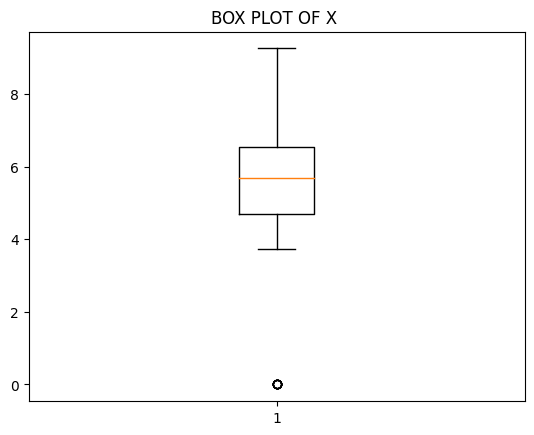

In [158]:
plt.boxplot(df['x'])
plt.title("BOX PLOT OF X ")

<function matplotlib.pyplot.show(close=None, block=None)>

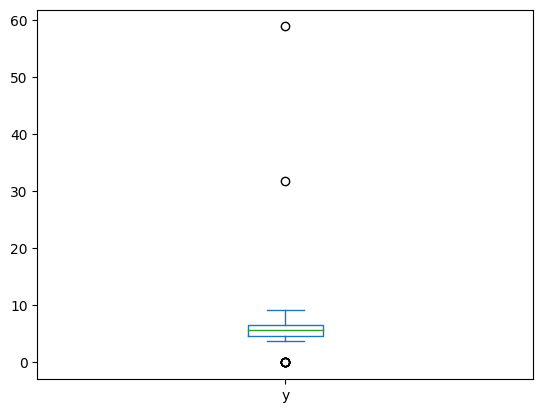

In [159]:
df['y'].plot(kind="box")
plt.show

In [160]:
Q11=df['y'].quantile(0.25)
Q22=df['y'].quantile(0.5)
Q33=df['y'].quantile(0.75)

In [161]:
print(Q11)
print(Q22)
print(Q33)

4.72
5.71
6.54


In [162]:
df['y'].median()

5.71

In [163]:
IQR=Q33-Q11
LC=Q11-(1.5*IQR)
UC=Q33+(1.5*IQR)
print(LC,UC)

1.9899999999999993 9.27


In [164]:
print(LC)
print(UC)

1.9899999999999993
9.27


In [165]:
outliers=[]
for x in df['y']:
  if((x>UC)or(x<LC)):
    outliers.append(x)

In [166]:
outliers

[0.0, 0.0, 58.9, 0.0, 0.0, 0.0, 31.8, 0.0, 0.0]

In [167]:
b = df['y']>UC
df.loc[b].index

Int64Index([24067, 49189], dtype='int64')

In [168]:
df=df.drop([ 24067, 49189])

Text(0.5, 1.0, 'BOX PLOT OF Y ')

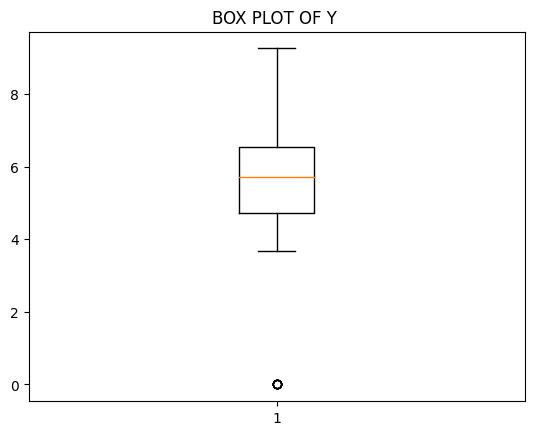

In [169]:
plt.boxplot(df['y'])
plt.title("BOX PLOT OF Y ")

## **ENCODING**

In [179]:
###categorical values

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53914 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53914 non-null  float64
 1   cut        53914 non-null  object 
 2   color      53914 non-null  object 
 3   clarity    53914 non-null  object 
 4   table      53914 non-null  float64
 5   x          53914 non-null  float64
 6   y          53914 non-null  float64
 7   z          53914 non-null  float64
 8   price_new  53914 non-null  float64
dtypes: float64(6), object(3)
memory usage: 4.1+ MB


In [181]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [182]:
cat=['cut', 'color', 'clarity']

In [183]:
df[cat]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [184]:
###ONE HOT ENCODING

In [185]:
df.cut.nunique()

5

In [186]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [195]:
df = pd.get_dummies(df)

In [197]:
df.head()

,carat,table,x,y,z,price_new,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,3.95,3.98,2.43,163.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,3.89,3.84,2.31,163.0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,4.05,4.07,2.31,163.5,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,4.20,4.23,2.63,167.0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,4.34,4.35,2.75,167.5,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [199]:
df.columns

Index(['carat', 'table', 'x', 'y', 'z', 'price_new', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

### **SCALING**

In [206]:
x.describe()

,carat,table,x,y,z,price_new,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,...,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000
mean,0.796739,57.456551,5.729379,5.731352,3.538458,1963.747051,0.090941,0.399674,0.255555,0.224079,...,0.100419,0.051953,0.013466,0.033201,0.242330,0.170364,0.151538,0.227344,0.067793,0.093964
std,0.470622,2.233845,1.118901,1.110620,0.701868,1991.124682,0.287528,0.489836,0.436177,0.416978,...,0.300561,0.221934,0.115260,0.179163,0.428497,0.375956,0.358575,0.419120,0.251393,0.291782
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.030000,2659.375000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.110000,95.000000,9.260000,9.250000,31.800000,9411.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
type(x)

pandas.core.frame.DataFrame

In [208]:
type(df)

pandas.core.frame.DataFrame

In [209]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
x = standardisation.fit_transform(x)

In [210]:
x=pd.DataFrame(x)

In [211]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,...,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04,5.391400e+04
mean,1.518242e-16,-5.128286e-15,-8.666634e-16,-7.169478e-16,2.994311e-16,2.952138e-17,-5.956993e-17,7.222195e-17,2.952138e-17,4.639074e-17,...,-5.587976e-17,-4.111907e-17,-2.214104e-17,5.798843e-17,6.536877e-17,5.218958e-17,-7.591212e-17,5.482542e-17,9.594449e-17,-1.581503e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.267993e+00,-6.471661e+00,-5.120588e+00,-5.160546e+00,-5.041535e+00,-9.043953e-01,-3.162891e-01,-8.159414e-01,-5.859034e-01,-5.373929e-01,...,-3.341091e-01,-2.340943e-01,-1.168319e-01,-1.853138e-01,-5.655409e-01,-4.531531e-01,-4.226141e-01,-5.424355e-01,-2.696726e-01,-3.220395e-01
25%,-8.430192e-01,-6.520438e-01,-9.110618e-01,-9.106275e-01,-8.954164e-01,-7.479496e-01,-3.162891e-01,-8.159414e-01,-5.859034e-01,-5.373929e-01,...,-3.341091e-01,-2.340943e-01,-1.168319e-01,-1.853138e-01,-5.655409e-01,-4.531531e-01,-4.226141e-01,-5.424355e-01,-2.696726e-01,-3.220395e-01
50%,-2.055586e-01,-2.043810e-01,-2.625693e-02,-1.922511e-02,-1.205096e-02,-3.835793e-01,-3.162891e-01,-8.159414e-01,-5.859034e-01,-5.373929e-01,...,-3.341091e-01,-2.340943e-01,-1.168319e-01,-1.853138e-01,-5.655409e-01,-4.531531e-01,-4.226141e-01,-5.424355e-01,-2.696726e-01,-3.220395e-01
75%,5.168967e-01,6.909447e-01,7.244866e-01,7.281122e-01,7.003405e-01,3.493676e-01,-3.162891e-01,1.225578e+00,1.706766e+00,-5.373929e-01,...,-3.341091e-01,-2.340943e-01,-1.168319e-01,-1.853138e-01,-5.655409e-01,-4.531531e-01,-4.226141e-01,-5.424355e-01,-2.696726e-01,-3.220395e-01
max,4.915375e+00,1.680681e+01,3.155466e+00,3.168214e+00,4.026656e+01,3.740510e+00,3.161665e+00,1.225578e+00,1.706766e+00,1.860836e+00,...,2.993035e+00,4.271782e+00,8.559305e+00,5.396254e+00,1.768219e+00,2.206760e+00,2.366225e+00,1.843537e+00,3.708201e+00,3.105209e+00


In [212]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))

MSE is: 1.2204899688891422e-30
R sqaured value is: 1.0


In [ ]:
###   Min Max Scaling

In [214]:
x = df.drop('cut_Fair',axis =1)

In [215]:
x.describe()

,carat,table,x,y,z,price_new,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,...,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000
mean,0.796739,57.456551,5.729379,5.731352,3.538458,1963.747051,0.090941,0.399674,0.255555,0.224079,...,0.100419,0.051953,0.013466,0.033201,0.242330,0.170364,0.151538,0.227344,0.067793,0.093964
std,0.470622,2.233845,1.118901,1.110620,0.701868,1991.124682,0.287528,0.489836,0.436177,0.416978,...,0.300561,0.221934,0.115260,0.179163,0.428497,0.375956,0.358575,0.419120,0.251393,0.291782
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,59.000000,6.540000,6.540000,4.030000,2659.375000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.110000,95.000000,9.260000,9.250000,31.800000,9411.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [217]:
x = min_max.fit_transform(x)

In [218]:
x = pd.DataFrame(x)

In [219]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
count,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,...,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000,53914.000000
mean,0.205065,0.278011,0.618723,0.619606,0.111272,0.194707,0.090941,0.399674,0.255555,0.224079,...,0.100419,0.051953,0.013466,0.033201,0.242330,0.170364,0.151538,0.227344,0.067793,0.093964
std,0.161726,0.042959,0.120832,0.120067,0.022071,0.215292,0.287528,0.489836,0.436177,0.416978,...,0.300561,0.221934,0.115260,0.179163,0.428497,0.375956,0.358575,0.419120,0.251393,0.291782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068729,0.250000,0.508639,0.510270,0.091509,0.033681,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.171821,0.269231,0.615551,0.617297,0.111006,0.112126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.288660,0.307692,0.706263,0.707027,0.126730,0.269922,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is:',mean_squared_error(y_test,predictions))
print('R sqaured value is:',r2_score(y_test,predictions))


MSE is: 1.8869348193850865e-31
R sqaured value is: 1.0
